In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the data
file_path = r"C:\Users\n\Downloads\student score.xlsx - Sheet1.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the data
print(data.head())

   ID        Start time   Completion time      Email  Name  \
0   1  9/26/24 19:44:00  9/26/24 20:04:55  anonymous   NaN   
1   2   9/27/24 8:55:30   9/27/24 9:15:32  anonymous   NaN   
2   3  9/27/24 11:14:53  9/27/24 11:19:45  anonymous   NaN   
3   4  9/29/24 10:03:56  9/29/24 10:15:21  anonymous   NaN   

   Total points out of 19 Quiz feedback Grade posted time  Last modified time  \
0                      17     Well done   10/1/24 2:44:26                 NaN   
1                      16     well Done   10/1/24 3:14:18                 NaN   
2                      15     well done   10/1/24 3:14:06                 NaN   
3                      15     Well done   10/1/24 3:21:58                 NaN   

  A patient with Type 2 diabetes presents with chest pain and shortness of breath. Which of the following is the most critical cardiovascular complication to monitor?  \
0                         a. Coronary artery disease                                                             

In [2]:
# Step 1: Frequency Distribution
frequency_distribution = data['Total points out of 19'].value_counts().sort_index()
print("\nFrequency Distribution:\n", frequency_distribution)


Frequency Distribution:
 15    2
16    1
17    1
Name: Total points out of 19, dtype: int64


In [3]:
# Step 2: Normal Distribution Check
mean = np.mean(data['Total points out of 19'])
std_dev = np.std(data['Total points out of 19'])
print("\nMean:", mean)
print("Standard Deviation:", std_dev)


Mean: 15.75
Standard Deviation: 0.82915619758885


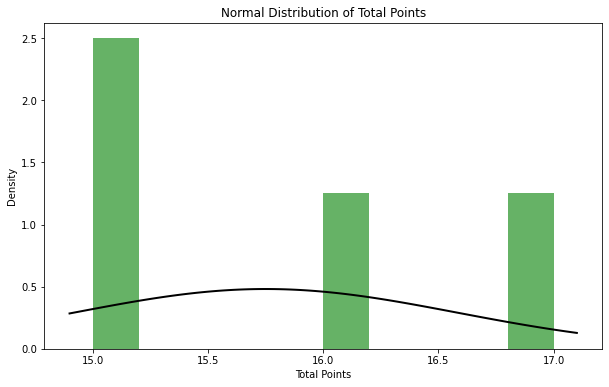

In [4]:
# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.hist(data['Total points out of 19'], bins=10, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Normal Distribution of Total Points')
plt.xlabel('Total Points')
plt.ylabel('Density')
plt.show()


In [5]:
# Step 3: Median
median = np.median(data['Total points out of 19'])
print("Median:", median)

Median: 15.5


In [6]:
# Step 4: P-value Calculation
# For demonstration, let's calculate the p-value for the total points against a hypothetical mean (e.g., 15)
hypothetical_mean = 15
t_statistic, p_value = stats.ttest_1samp(data['Total points out of 19'], hypothetical_mean)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 1.5666989036012806
P-Value: 0.21516994256954994


In [7]:
# Step 5: Discrimination Index Calculation for Each Question
# Assume questions are in the format: 'Points - <question text>'
question_columns = [col for col in data.columns if 'Points -' in col]
discrimination_index = {}

for question in question_columns:
    # Calculate discrimination index
    # Assuming '1' is correct and '0' is incorrect
    correct_answers = data[question].astype(int)  # Convert to integer
    score = data['Total points out of 19']
    discrimination_index[question] = np.corrcoef(correct_answers, score)[0, 1]

# Display Discrimination Index for each question
print("\nDiscrimination Index for each question:\n", discrimination_index)


C:\Users\n\anaconda3\lib\site-packages\numpy\lib\function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\n\anaconda3\lib\site-packages\numpy\lib\function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer